### Student Information
Name: 張方瑜

Student ID: 111065539

GitHub ID: RolaChang

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

---

# Take Home Exercise

###  >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [351]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X_sample = X.sample(n=1000)
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [11]:
#Answer here
X.loc[:10, lambda df: ['text']]

text
0   From: sd345@city.ac.uk (Michael Collier) Subje...
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4   From: stanly@grok11.columbiasc.ncr.com (stanly...
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...
7   From: aldridge@netcom.com (Jacquelin Aldridge)...
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...

In [347]:
X.iloc[155:, [0, 2]].head(10)

text           category_name
155  From: lvandyke@balboa.eng.uci.edu (Lee Van Dyk...           comp.graphics
156  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
157  From: mcovingt@aisun3.ai.uga.edu (Michael Covi...                 sci.med
158  From: livesey@solntze.wpd.sgi.com (Jon Livesey...             alt.atheism
159  From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...  soc.religion.christian
160  From: noring@netcom.com (Jon Noring) Subject: ...                 sci.med
161  From: clldomps@cs.ruu.nl (Louis van Dompselaar...           comp.graphics
162  From: neideck@nestvx.enet.dec.com (Burkhard Ne...           comp.graphics
163  From: tbrent@ecn.purdue.edu (Timothy J Brent) ...  soc.religion.christian
164  From: a137490@lehtori.cc.tut.fi (Aario Sami) S...             alt.atheism

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [12]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

### Answer here

Because in the cases of {id C:'NaN', id D:'None', id F:''} 
all of them are string type in the text content of NaN, None, and empty value, which let .isnull() didn't work.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

### Answer here

- new columns added : category, category_name
- add and later drop missing value and duplicate row
- smapling data from X. .sample(n) randomly selects the rows in original dataset and the index of selected set is shuffled.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

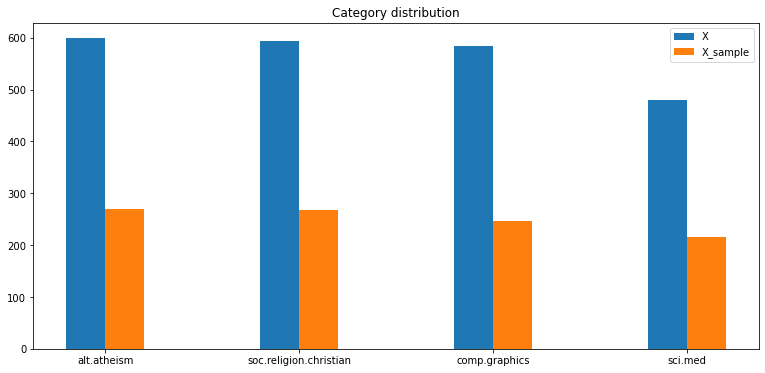

In [388]:
# Answer here
# plot barchart for X and X_sample

bar_width = 0.2
index = np.arange(len(categories))

# create the figure
fig, ax = plt.subplots(figsize=(13, 6))

# plot each bar
rects1 = ax.bar(index - bar_width/2, X.category_name.value_counts(), bar_width, label='X')
rects2 = ax.bar(index + bar_width/2, X_sample.category_name.value_counts(), bar_width, label='X_sample')

ax.set_title('Category distribution')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

### Answer here

Use print(X_counts[0:5, 0:100]) we can get this result:
- (4, 0)	1
- (4, 37)	1
   
Based on the information above, we can use the code below to veriy what the word is:
- count_vect.get_feature_names( )[37]

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

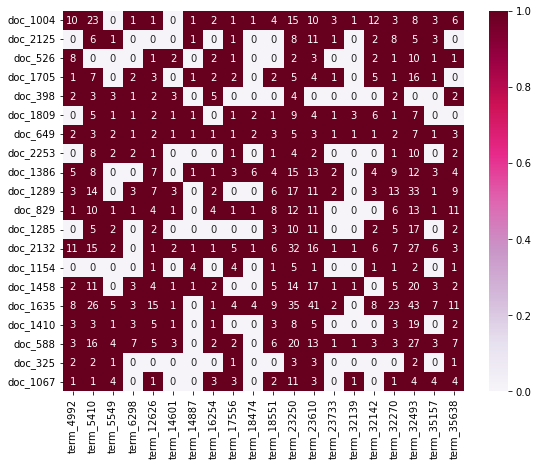

In [25]:
# Answer here

## First, filter the top 20 terms with frequency 
f = np.asarray(X_counts.sum(axis=0))[0]
idx = []
for i in range(len(f)):
    if f[i]>=3500:
        idx.append(i)
plot_x = ["term_"+str(i) for i in idx]        

## Second, ramdomly select the doc

plot_y = ["doc_"+ str(i) for i in np.random.choice(range(2257), 20, replace=False)]
doc_idx = [712,2104,98,399, 453, 1502, 1656, 388, 69, 1002, 182, 746, 251, 1032, 619, 252, 1264, 1613, 682, 793]


## Third, prepared plot_z
doc_idx = [712,2104,98,399, 453, 1502, 1656, 388, 69, 1002, 182, 746, 251, 1032, 619, 252, 1264, 1613, 682, 793]

plot_z = []
for i in idx:  
    doc = [X_counts[j, i] for j in doc_idx]
    plot_z.append(doc)
    
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

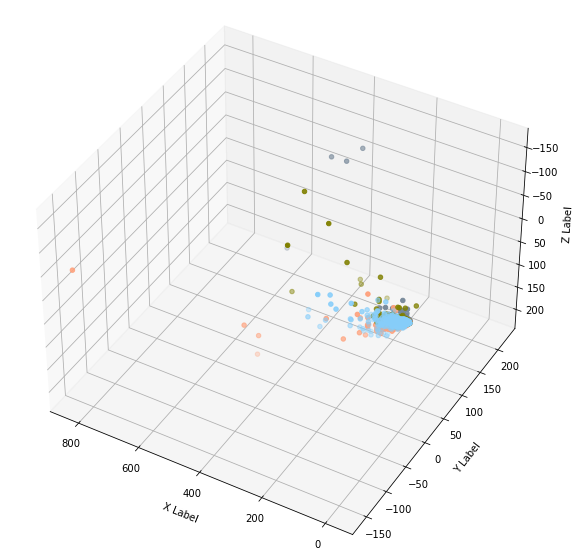

In [334]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['lightsalmon', 'lightskyblue', 'lightslategray', 'olive']
# plot

def plot3d(elevated_angle, horizontal_angle):
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection='3d')

    for c, category in zip(col, categories): 
        #c for color, category for category_name
        xs = X_reduced3[X['category_name'] == category].T[0]
        ys = X_reduced3[X['category_name'] == category].T[1]
        zs = X_reduced3[X['category_name'] == category].T[2]
   
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    
    ax.view_init(elevated_angle, horizontal_angle)
    plt.show()
    
plot3d(-140,60)

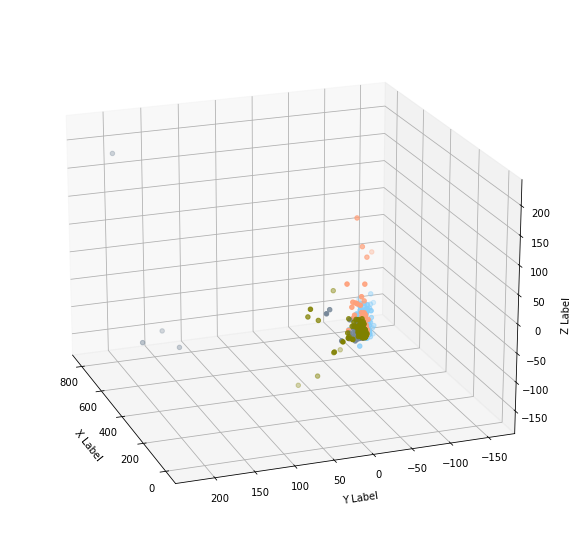

In [335]:
plot3d(20,160)

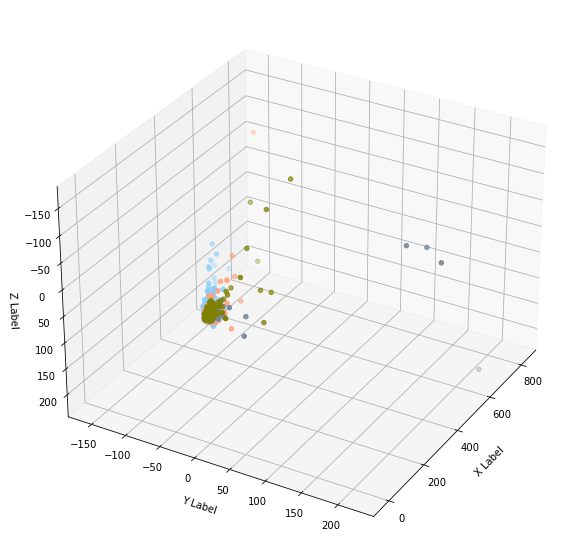

In [339]:
plot3d(-150,-30)

### Answer here
##### WHAT I FOUND:
Reducing the dimension to 3 can sperate data better.  
However, there is still a overlapping part and hard to gain useful information from obeservation with different angle.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [37]:
# Answer here
import plotly.offline as pyo
pyo.init_notebook_mode()

import plotly.express as px
g = px.bar(x=count_vect.get_feature_names()[:300], 
           y=term_frequencies[:300])
g.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [38]:
# Answer here

#first :used box plot to observe the frequency distribution
#(q1:1 ,q2:2, q3:6, upper fence:13)
#fig = px.box(y=term_frequencies)
#fig.show()

#second :based on the information from box plot, I decided to filter the frequency>=300 terms to visualize.

frequency = np.asarray(X_counts.sum(axis=0))[0]

idx = []
for i in range(len(frequency)):
    if frequency[i]>=300:
        idx.append(i)
        
feature_names =[]
for j in idx:
    feature_names.append(count_vect.get_feature_names()[j])
    
frequency = [a for a in frequency if a >= 300]

#third :show the plot
g = px.bar(x=feature_names, 
           y=frequency)
g.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [39]:
# Answer here

g = px.bar(x=feature_names, 
           y=frequency).update_xaxes(categoryorder = 'total descending')
g.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

### Answer here
Yes

In [40]:
# Answer here

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

---

# Lab1 Homework

In [1]:
### Begin Assignment Here

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. Data Transformation
Load data and convert it to Dataframe.

In [289]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_punctuation, lemmatize_word

def file_to_dataframe(doc, source):    
    df = pd.DataFrame({'sentence': [], 'label': []})
    preprocess_functions = [to_lower, remove_punctuation, lemmatize_word]
    with open(doc, 'r', encoding='UTF-8') as f:
        for line in f:
            tokens = line.split("	")
            df.loc[len(df.index)] = [preprocess_text(tokens[0], preprocess_functions), re.findall(r'\d+', tokens[1])[0]] 
        df['source'] = source
        return df

In [290]:
import os

# setting data_path for trainning set
dir_data = 'sentiment_labelled_sentences\sentiment labelled sentences'

imdb = os.path.join(dir_data, 'imdb_labelled.txt')
amazon = os.path.join(dir_data, 'amazon_cells_labelled.txt')
yelp = os.path.join(dir_data, 'yelp_labelled.txt')

# read file and convert into pandas dataframe
df_imdb = file_to_dataframe(imdb, 'imdb')
df_amazon = file_to_dataframe(amazon, 'amazon')
df_yelp = file_to_dataframe(yelp, 'yelp')

df_data = pd.concat([df_imdb, df_amazon, df_yelp])
df_data.head()

sentence label source
0  a very very very slowmoving aimless movie abou...     0   imdb
1  not sure who wa more lost the flat character o...     0   imdb
2  attempting artiness with black white and cleve...     0   imdb
3          very little music or anything to speak of     0   imdb
4  the best scene in the movie wa when gerardo is...     1   imdb

In [291]:
len(df_data)

3000

In [292]:
df_data[-5:]

sentence label source
995  i think food should have flavor and texture an...     0   yelp
996                            appetite instantly gone     0   yelp
997   overall i wa not impressed and would not go back     0   yelp
998  the whole experience wa underwhelming and i th...     0   yelp
999  then a if i hadnt wasted enough of my life the...     0   yelp

## 2. Data Mining using Pandas
Dealing with missing values and duplicate data.

In [293]:
# check missing values
df_data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

In [294]:
sum(df_data.duplicated()), sum(df_data.duplicated(['sentence','label']))

(28, 33)

In [295]:
# get rid of all the duplicated records but preserve a copy.
df_data.drop_duplicates(keep='first', inplace=True)
sum(df_data.duplicated())

0

## 3. Data Preprocessing
- Visualizing data and digging into the details.
- Generate TF-IDF features from the tokens of each text. 
- Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.

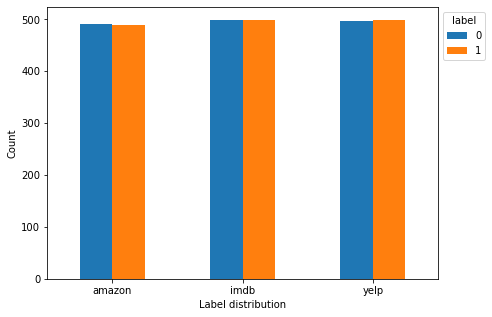

In [296]:
# check the label distribution seperated by source doc. 
# to get the dataframe in the correct shape, unstack the groupby result
df = df_data.groupby(['source']).label.value_counts().unstack()

# plot
ax = df.plot(kind='bar', figsize=(7, 5), xlabel='Label distribution', ylabel='Count', rot=0)
ax.legend(title='label', bbox_to_anchor=(1, 1), loc='upper left')

In [298]:
# generate a document-term matrix
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_data.sentence) #learn the vocabulary and return document-term matrix
df_counts.shape

(2972, 4947)

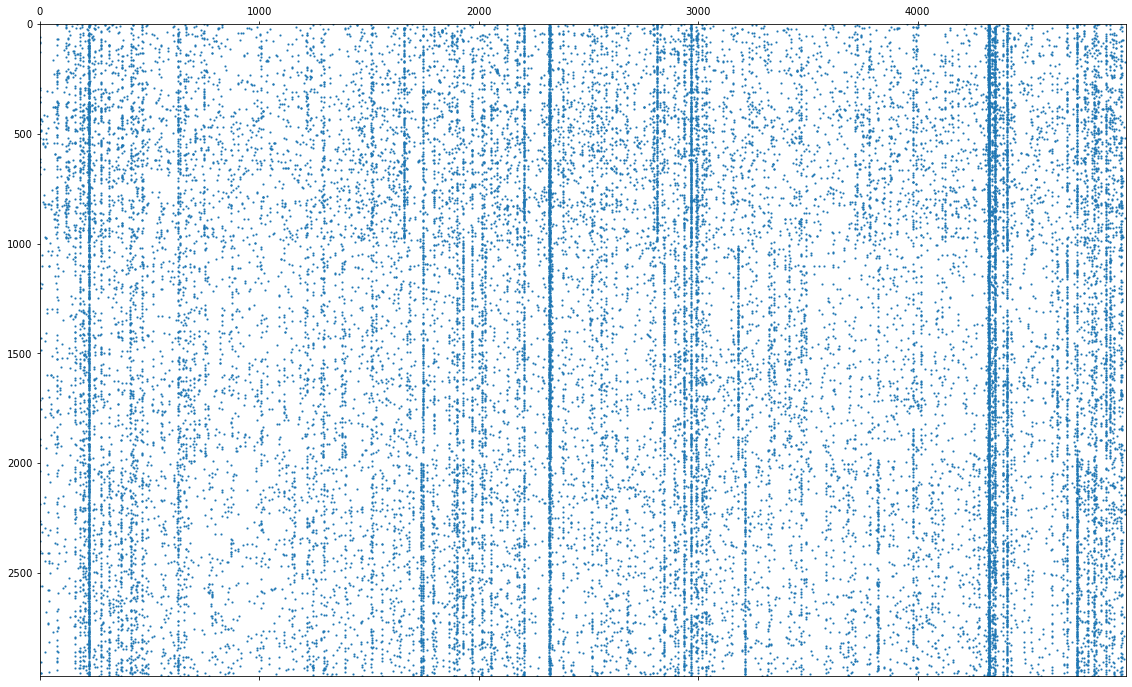

In [299]:
# Plot the sparsity pattern of a df_counts.
plt.subplots(figsize=(20, 12))
plt.spy(df_counts, markersize=1)

In [300]:
# generate tfidf features

tfidf_vect_p2 = TfidfVectorizer()
data_tfidf = tfidf_vect_p2.fit_transform(df_data.sentence)
data_tfidf.shape

(2972, 4947)

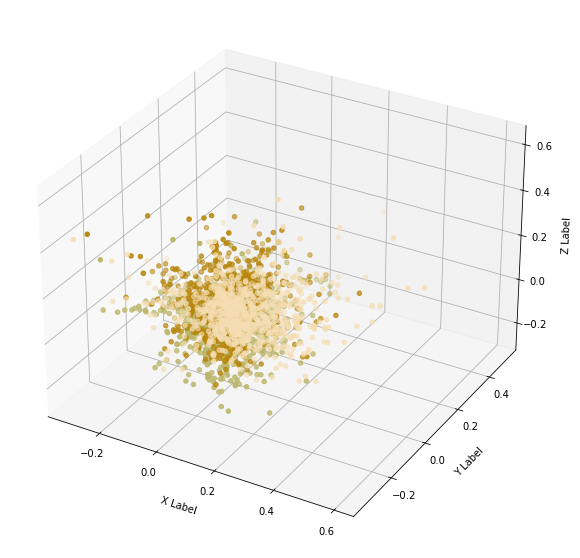

In [301]:
from sklearn.decomposition import PCA

data_tfidf_reduced = PCA(n_components = 3).fit_transform(data_tfidf.toarray())
col = ['darkkhaki', 'darkgoldenrod', 'wheat']
source = ['imdb', 'amazon', 'yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, s in zip(col, source): 
    #c for color, s for source
    xs = data_tfidf_reduced[df_data['source'] == s].T[0]
    ys = data_tfidf_reduced[df_data['source'] == s].T[1]
    zs = data_tfidf_reduced[df_data['source'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [229]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [302]:
# use term frequency features to build Naive Bayes classifier.

x = df_counts
y = df_data['label']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8216787562425146

In [303]:
# Use tfidf features to build classifiers.

x = data_tfidf
y = df_data['label']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8213341468375026

### Comment :

I bulid the model two times with diferent data preprocessing details.

First time I only remove the the punctuation in sentences and convert tokens to lower case,
the accuracy of classifier with TF-IDF features is slightly higher than the one with word frequency features.

Second time based on the previous process I add text_preprocessing package to get rid of stop words and lemmatize words,
it did imporve the accuracy of classifier.
However, it gained opposite result, the accuracy of classifier with TF-IDF features turned out to be slightly lower than the one with word frequency features.

## 4. Data preprocessing improvement

In my opinion, in Lab-1 "Feature subset selection" part, using the original tokens without filter out number to generate document-term matrix is not quite meaningful.

Because the data collected from email, there were too much irrelevant sentence like email address, tel number, fax number and so on. We should get rid of it in the data preprocessing to assure we can get more informational data.

In [315]:
import re
import string
from string import digits

def translator(text):
    text = text.translate(str.maketrans('', '', string.punctuation)) #remove all punctuation marks from a text file
    text = text.translate(str.maketrans('', '', digits)) #remove digits from tokens
    return text

In [317]:
X['text5'] = X.text.apply(lambda x: translator(x))
print(X.text5[0])

From sdcityacuk Michael Collier Subject Converting images to HP LaserJet III NntpPostingHost hampton Organization The City University Lines   Does anyone know of a good way standard PC applicationPD utility to convert tifimgtga files into LaserJet III format  We would also like to do the same converting to HPGL HP plotter files  Please email any response  Is this the correct group  Thanks in advance  Michael   Michael Collier Programmer                 The Computer Unit Email MPCollierukaccity                The City University Tel   x                      London Fax                              ECV HB 


In [ ]:
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X.text5) #learn the vocabulary and return document-term matrix

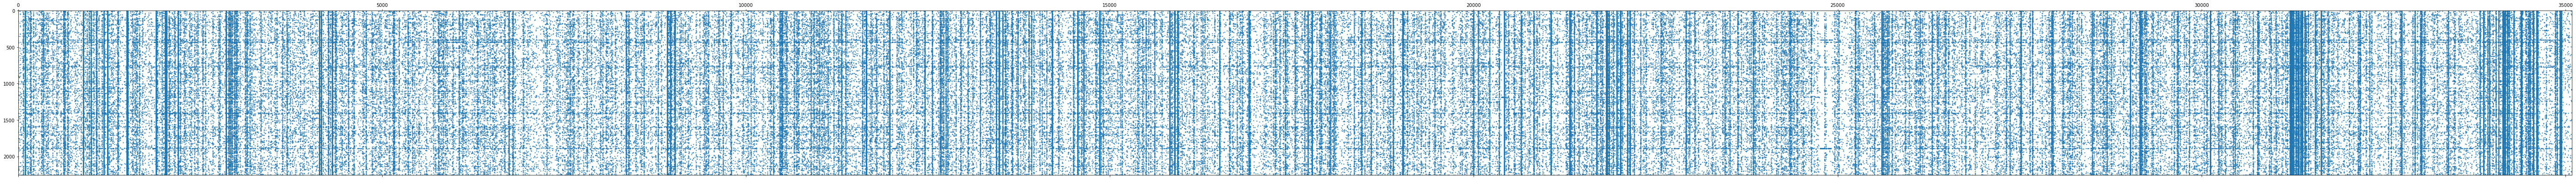

In [326]:
# Plot the sparsity pattern of a X_count.
plt.subplots(figsize=(100, 80))
plt.spy(X_count, markersize=1)